POLYGON ((114.1000602929242 22.53430897679428, 114.0996908540413 22.53519481989931, 114.099656654693 22.5377206686816, 114.0996396329411 22.5377876599435, 114.099654642094 22.53788265874935, 114.0996465926114 22.53851661949761, 114.0995812044618 22.54345529489501, 114.0995701578671 22.54399825616521, 114.0994707499332 22.5487129028022, 114.0994005523082 22.55065674065208, 114.0993454876711 22.55079571513375, 114.0993835044831 22.55112670071513, 114.0993674741049 22.55134467986608, 114.0993714701297 22.5514676716578, 114.0993584324915 22.551843639512, 114.0993874559957 22.55193264069541, 114.0993864500311 22.55200863461257, 114.099351412323 22.55204462224077, 114.0992220495704 22.55561730551648, 114.0991618265817 22.55811508260044, 114.0993529961132 22.55846010497801, 114.0993680093076 22.55849010654745, 114.0993890281881 22.55852610926863, 114.0994380720592 22.55861411534363, 114.0994570861739 22.55869311390149, 114.0994570844788 22.55871911168579, 114.099455073975 22.55884910003703, 1

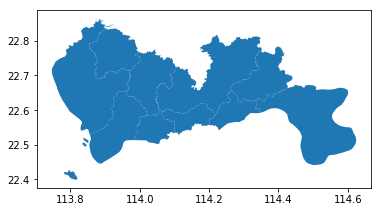

In [37]:
#导入必要的包
import pandas as pd
import numpy as np

#绘制图用的包
import matplotlib as mpl
import matplotlib.pyplot as plt

#geopandas包
import geopandas

#shapely包
from shapely.geometry import Point,Polygon,shape

#读取shapefile文件
shp = r'E:\\Jupyter\\pygeo-tutorial\\shapefile\\sz.shp'
sz = geopandas.GeoDataFrame.from_file(shp,encoding = 'utf-8')

#绘制 
sz.plot()
print(sz["geometry"][0])

In [4]:
#栅格化代码
import math
#定义一个测试栅格划的经纬度
testlon = 114
testlat = 22.5

#划定栅格划分范围
lon1 = 113.75194
lon2 = 114.624187
lat1 = 22.447837
lat2 = 22.864748

latStart = min(lat1, lat2);
lonStart = min(lon1, lon2);

#定义栅格大小(单位m)
accuracy = 500;

#计算栅格的经纬度增加量大小▲Lon和▲Lat
deltaLon = accuracy * 360 / (2 * math.pi * 6371004 * math.cos((lat1 + lat2) * math.pi / 360));
deltaLat = accuracy * 360 / (2 * math.pi * 6371004);

#计算栅格的经纬度编号
LONCOL=divmod(float(testlon) - (lonStart - deltaLon / 2) , deltaLon)[0]
LATCOL=divmod(float(testlat) - (latStart - deltaLat / 2) , deltaLat)[0]

#计算栅格的中心点经纬度
HBLON = LONCOL*deltaLon + (lonStart - deltaLon / 2)#格子编号*格子宽+起始横坐标-半个格子宽=格子中心横坐标
HBLAT = LATCOL*deltaLat + (latStart - deltaLat / 2)

#把算好的东西print出来看看
LONCOL,LATCOL,HBLON,HBLAT,deltaLon,deltaLat

(51.0,
 12.0,
 113.99800701150498,
 22.499547959873865,
 0.004872614089207591,
 0.004496605206422906)

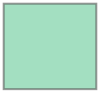

In [5]:
from shapely.geometry import Point,Polygon,shape
Polygon([(HBLON+deltaLon/2,HBLAT-deltaLat/2),
        (HBLON+deltaLon/2,HBLAT+deltaLat/2),
        (HBLON-deltaLon/2,HBLAT+deltaLat/2),
        (HBLON-deltaLon/2,HBLAT-deltaLat/2)])

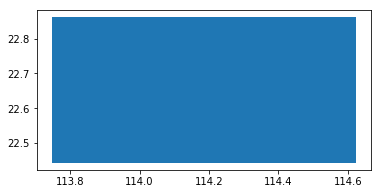

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point,Polygon,shape


#定义空的geopandas表
data = geopandas.GeoDataFrame()

#定义空的list，后面循环一次就往里面加东西
LONCOL = []
LATCOL = []
geometry = []
HBLON1 = []
HBLAT1 = []

#计算总共要生成多少个栅格
#lon方向是lonsnum个栅格
lonsnum = int((lon2-lon1)/deltaLon)+1
#lat方向是latsnum个栅格
latsnum = int((lat2-lat1)/deltaLat)+1

for i in range(lonsnum):
    for j in range(latsnum):

        HBLON = i*deltaLon + (lonStart - deltaLon / 2)
        HBLAT = j*deltaLat + (latStart - deltaLat / 2)
        #把生成的数据都加入到前面定义的空list里面
        LONCOL.append(i)
        LATCOL.append(j)
        HBLON1.append(HBLON)
        HBLAT1.append(HBLAT)
        
        #生成栅格的Polygon形状
        #这里我们用周围的栅格推算三个顶点的位置，否则生成的栅格因为小数点取值的问题会出现小缝，无法完美覆盖
        HBLON_1 = (i+1)*deltaLon + (lonStart - deltaLon / 2)
        HBLAT_1 = (j+1)*deltaLat + (latStart - deltaLat / 2)
        geometry.append(Polygon([
        (HBLON-deltaLon/2,HBLAT-deltaLat/2),
        (HBLON_1-deltaLon/2,HBLAT-deltaLat/2),
        (HBLON_1-deltaLon/2,HBLAT_1-deltaLat/2),
        (HBLON-deltaLon/2,HBLAT_1-deltaLat/2)]))
        
#为geopandas文件的每一列赋值为刚刚的list
data['LONCOL'] = LONCOL
data['LATCOL'] = LATCOL
data['HBLON'] = HBLON1
data['HBLAT'] = HBLAT1
data['geometry'] = geometry

data.plot()


In [7]:
data.head(5)

,LONCOL,LATCOL,HBLON,HBLAT,geometry
0,0,0,113.749504,22.445589,"POLYGON ((113.7470673859108 22.44334039479358,..."
1,0,1,113.749504,22.450085,"POLYGON ((113.7470673859108 22.447837, 113.751..."
2,0,2,113.749504,22.454582,"POLYGON ((113.7470673859108 22.45233360520643,..."
3,0,3,113.749504,22.459079,"POLYGON ((113.7470673859108 22.45683021041285,..."
4,0,4,113.749504,22.463575,"POLYGON ((113.7470673859108 22.46132681561927,..."


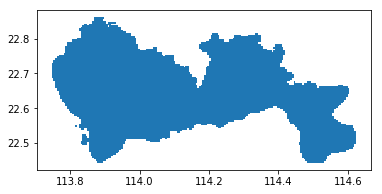

In [8]:
#取栅格和深圳行政区划的交集栅格
grid = data[data.intersects(sz.unary_union)]
grid.plot()

In [9]:
#保存
grid.to_file(r'E:\\Jupyter\\pygeo-tutorial\\shapefile\\grid',encoding = 'utf-8')

In [10]:
import pandas as pd
TaxiOD = pd.read_csv(r'E:\\Jupyter\\pygeo-tutorial\\data-sample\\TaxiOD.csv')
TaxiOD.columns = ['VehicleNum', 'Stime', 'SLng', 'SLat', 
       'ELng', 'ELat','Etime']
TaxiOD.head(5)

,VehicleNum,Stime,SLng,SLat,ELng,ELat,Etime
0,22223,00:03:23,114.167465,22.562468,114.225235,22.552750,00:10:48
1,22223,00:11:33,114.227150,22.554167,114.229218,22.560217,00:15:19
2,22223,00:17:13,114.231354,22.562166,114.255798,22.590967,00:29:06
3,22223,00:36:45,114.240196,22.563650,114.119965,22.566668,00:54:42
4,22223,01:01:14,114.135414,22.575933,114.166748,22.608267,01:08:17


In [16]:

###############################你需要在下面写代码##################################
#计算起点栅格的经纬度编号
TaxiOD = TaxiOD[-TaxiOD['ELng'].isnull()]
TaxiOD['SLONCOL'] = ((TaxiOD['SLng'] - (lonStart- deltaLon / 2))/deltaLon).astype("int")
TaxiOD['SLATCOL'] =((TaxiOD['SLat']- (latStart- deltaLat / 2))/ deltaLat).astype("int")

#计算起点栅格的中心点经纬度
TaxiOD['SHBLON'] = TaxiOD['SLONCOL']*deltaLon + (lonStart - deltaLon / 2)
TaxiOD['SHBLAT'] = TaxiOD['SLATCOL']*deltaLat + (latStart - deltaLat / 2)

#计算终点栅格的经纬度编号
TaxiOD['ELONCOL'] =((TaxiOD['ELng'] - (lonStart- deltaLon / 2))/ deltaLon).astype("int")
TaxiOD['ELATCOL'] =((TaxiOD['ELat'] - (latStart- deltaLat / 2))/deltaLat).astype("int")

#计算终点栅格的中心点经纬度
TaxiOD['EHBLON'] =  TaxiOD['ELONCOL']*deltaLon + (lonStart - deltaLon / 2)
TaxiOD['EHBLAT'] =  TaxiOD['ELATCOL']*deltaLat + (latStart - deltaLat / 2)

#筛选去掉起点终点在同一个格子里的OD
#筛选去掉不在研究范围内的栅格，TaxiOD的LONCOL、LATCOL都需要在我们的范围内


###################################################################################

TaxiOD.head(5)

,VehicleNum,Stime,SLng,SLat,ELng,ELat,Etime,SLONCOL,SLATCOL,SHBLON,SHBLAT,ELONCOL,ELATCOL,EHBLON,EHBLAT
0,22223,00:03:23,114.167465,22.562468,114.225235,22.552750,00:10:48,85,25,114.163676,22.558004,97,23,114.222147,22.549011
1,22223,00:11:33,114.227150,22.554167,114.229218,22.560217,00:15:19,98,24,114.227020,22.553507,98,25,114.227020,22.558004
2,22223,00:17:13,114.231354,22.562166,114.255798,22.590967,00:29:06,98,25,114.227020,22.558004,103,32,114.251383,22.589480
3,22223,00:36:45,114.240196,22.563650,114.119965,22.566668,00:54:42,100,26,114.236765,22.562500,76,26,114.119822,22.562500
4,22223,01:01:14,114.135414,22.575933,114.166748,22.608267,01:08:17,79,28,114.134440,22.571494,85,36,114.163676,22.607466


In [17]:
#筛选去掉起点终点在同一个格子里的OD
TaxiOD = TaxiOD[-((TaxiOD['SLONCOL']==TaxiOD['ELONCOL'])&(TaxiOD['SLATCOL']==TaxiOD['ELATCOL']))]
#筛选去掉不在研究范围内的栅格
TaxiOD = TaxiOD[(TaxiOD['SLONCOL']>=0) & (TaxiOD['SLATCOL']>=0) &(TaxiOD['ELONCOL']>=0) & (TaxiOD['ELATCOL']>=0)&
(TaxiOD['SLONCOL']<=lonsnum) & (TaxiOD['SLATCOL']<=latsnum) &(TaxiOD['ELONCOL']<=lonsnum) & (TaxiOD['ELATCOL']<=latsnum)]

In [19]:
#OD按大小排序
#OD = OD.sort_values(by = 'VehicleNum',ascending = False)

#这个是对每一列都计数了，所以取其中一列出来，例如我这里取了['VehicleNum']
OD= TaxiOD.groupby(['SLONCOL','SLATCOL','ELONCOL','ELATCOL'])['VehicleNum'].count().reset_index()
print(OD.head(5))

   SLONCOL  SLATCOL  ELONCOL  ELATCOL  VehicleNum
0        0       72       33       20           1
1        0       75       14       70           1
2        0       81       19       64           1
3        1       74       10       75           1
4        1       77        5       78           1


In [20]:
#取前20的OD
Topod = OD.iloc[:20].copy()
print(Topod.head(5))
#计算起点栅格的中心点经纬度
Topod['SHBLON'] = Topod['SLONCOL'] * deltaLon + (lonStart - deltaLon / 2)
Topod['SHBLAT'] = Topod['SLATCOL'] * deltaLat + (latStart - deltaLat / 2)

#计算终点栅格的中心点经纬度
Topod['EHBLON'] = Topod['ELONCOL'] * deltaLon + (lonStart - deltaLon / 2)
Topod['EHBLAT'] = Topod['ELATCOL'] * deltaLat + (latStart - deltaLat / 2)

   SLONCOL  SLATCOL  ELONCOL  ELATCOL  VehicleNum
0        0       72       33       20           1
1        0       75       14       70           1
2        0       81       19       64           1
3        1       74       10       75           1
4        1       77        5       78           1


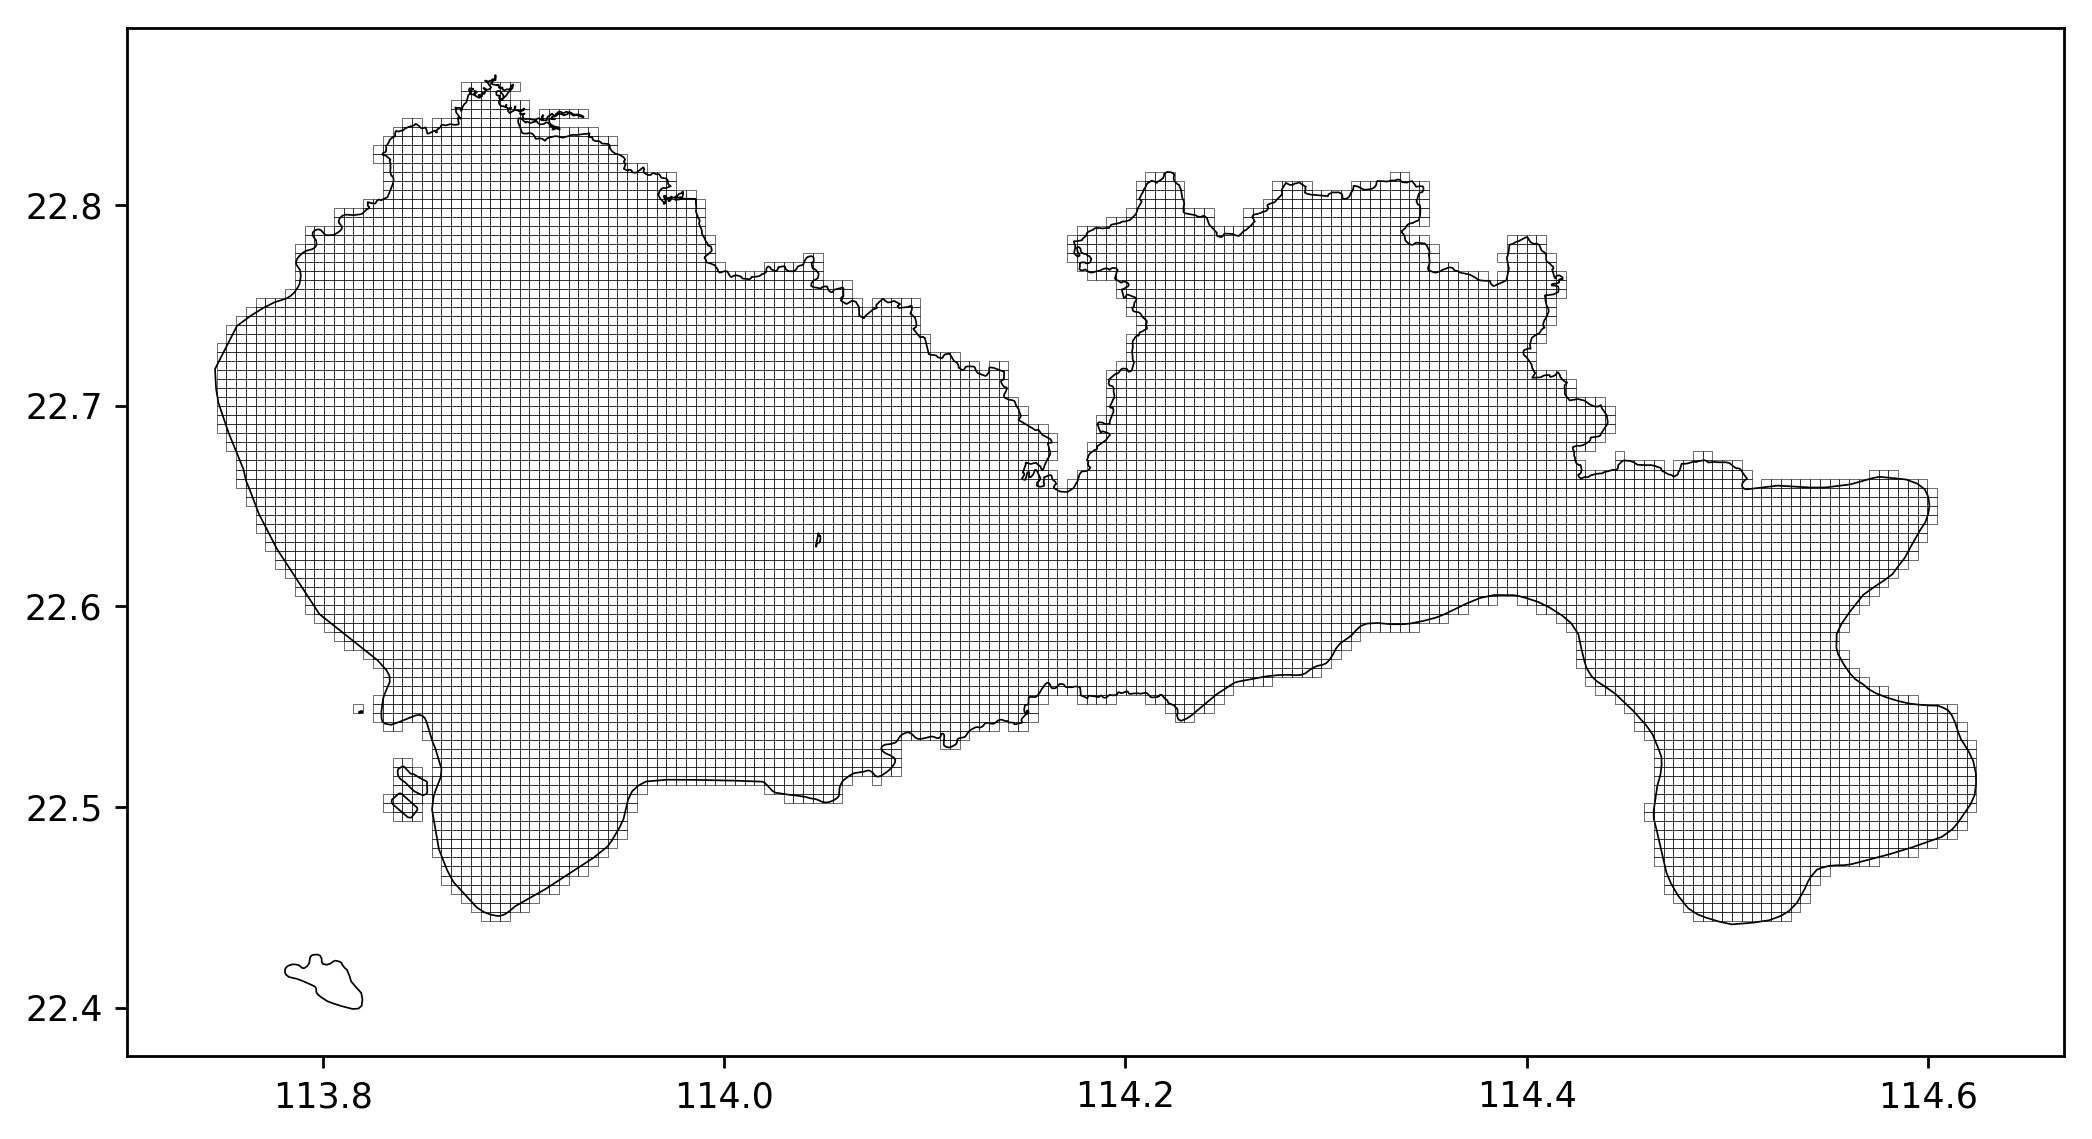

In [25]:
#导入绘图包
import matplotlib as mpl
import matplotlib.pyplot as plt
fig     = plt.figure(1,(10,8),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)
#把刚才生成的栅格在ax上绘制
grid.plot(ax =ax,edgecolor = (0,0,0,0.8),facecolor = (0,0,0,0),linewidths=0.2)
#把合并的行政区划变成一个geopandas，在ax上绘制
SZ_all = geopandas.GeoDataFrame()
SZ_all['geometry'] = [sz.unary_union]
SZ_all.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5)

plt.show()

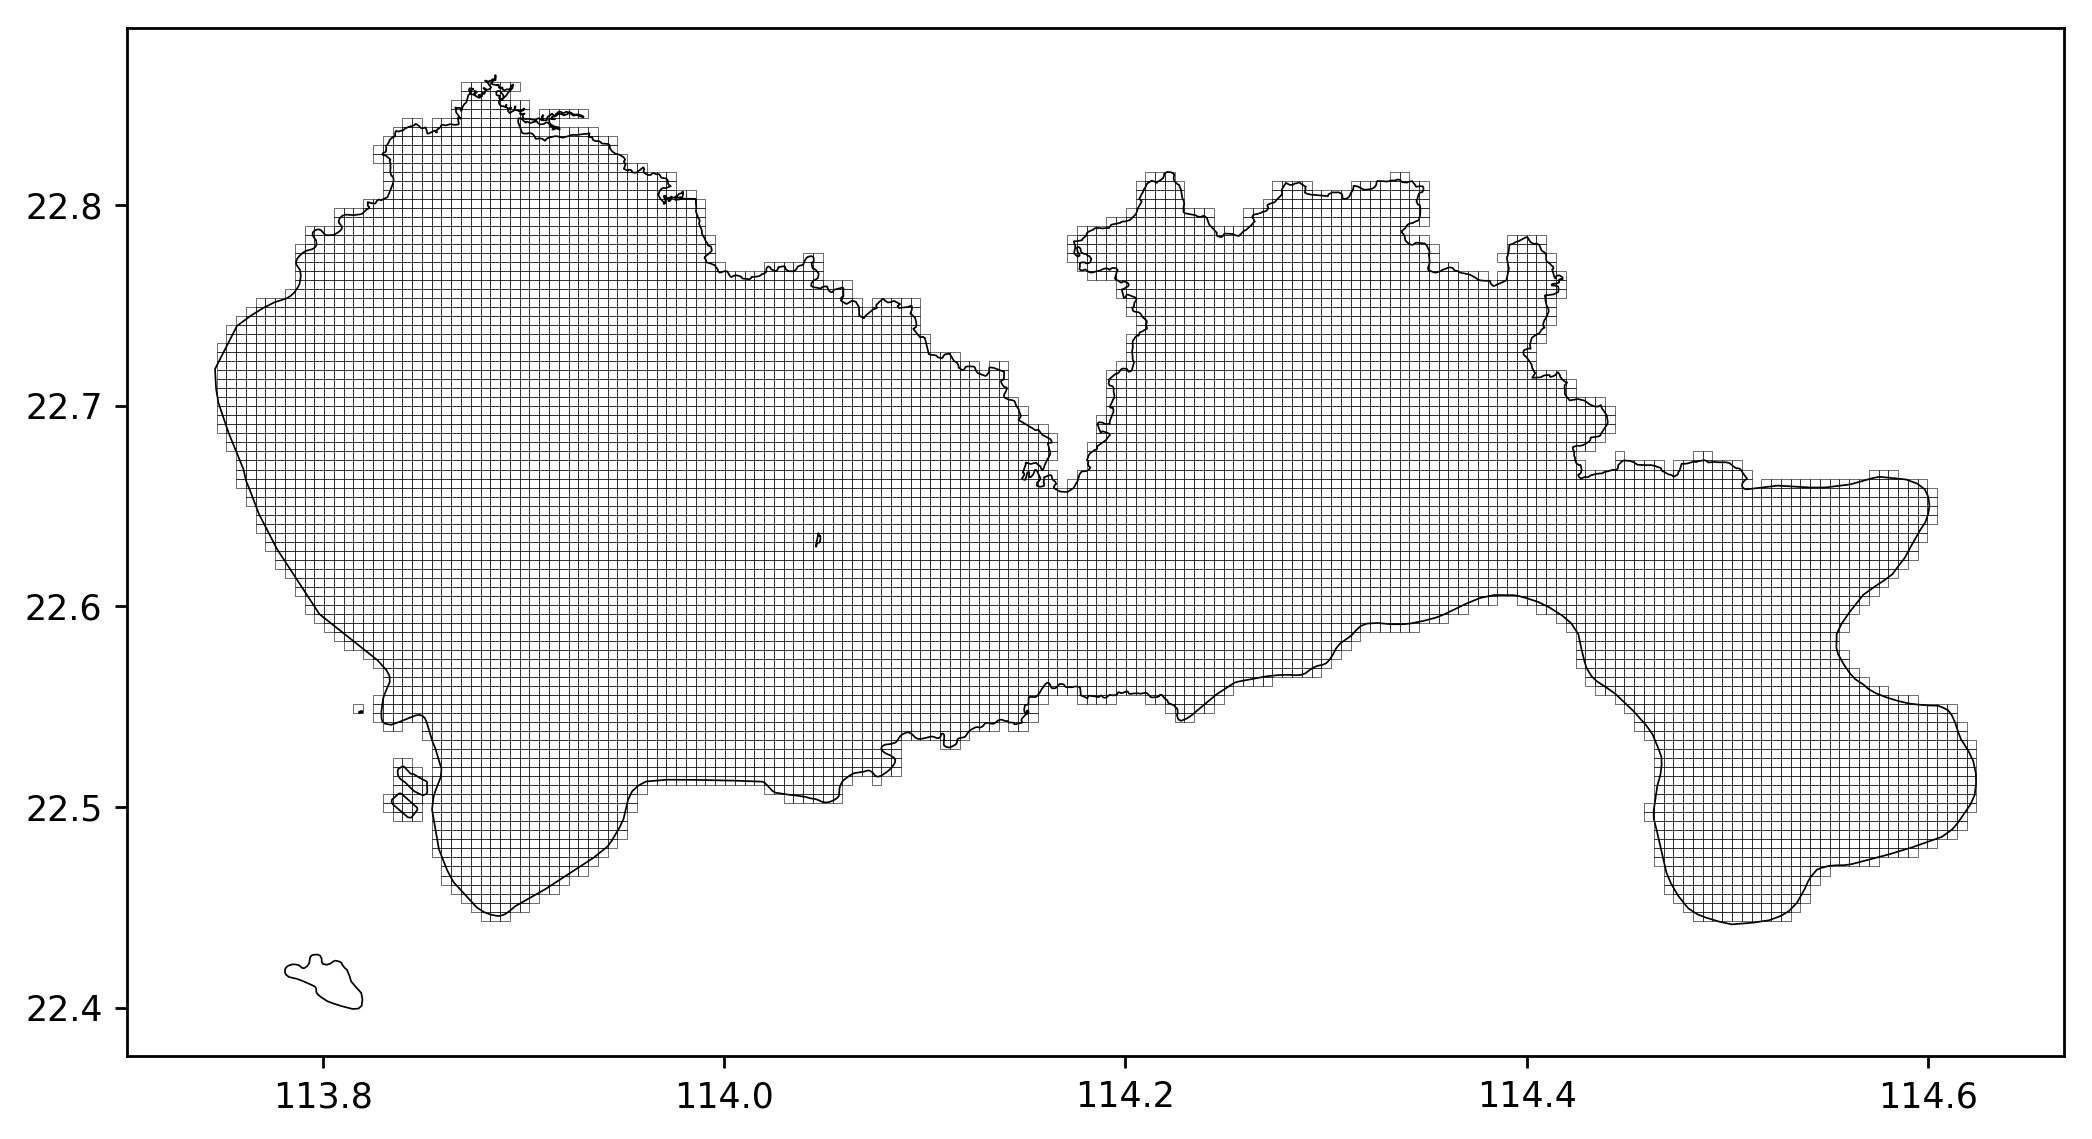

In [24]:
fig     = plt.figure(1,(10,8),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

#把刚才生成的栅格在ax上绘制
grid.plot(ax =ax,edgecolor = (0,0,0,0.8),facecolor = (0,0,0,0),linewidths=0.2)

#把合并的行政区划变成一个geopandas，在ax上绘制
SZ_all = geopandas.GeoDataFrame()
SZ_all['geometry'] = [sz.unary_union]
SZ_all.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5)

plt.show()

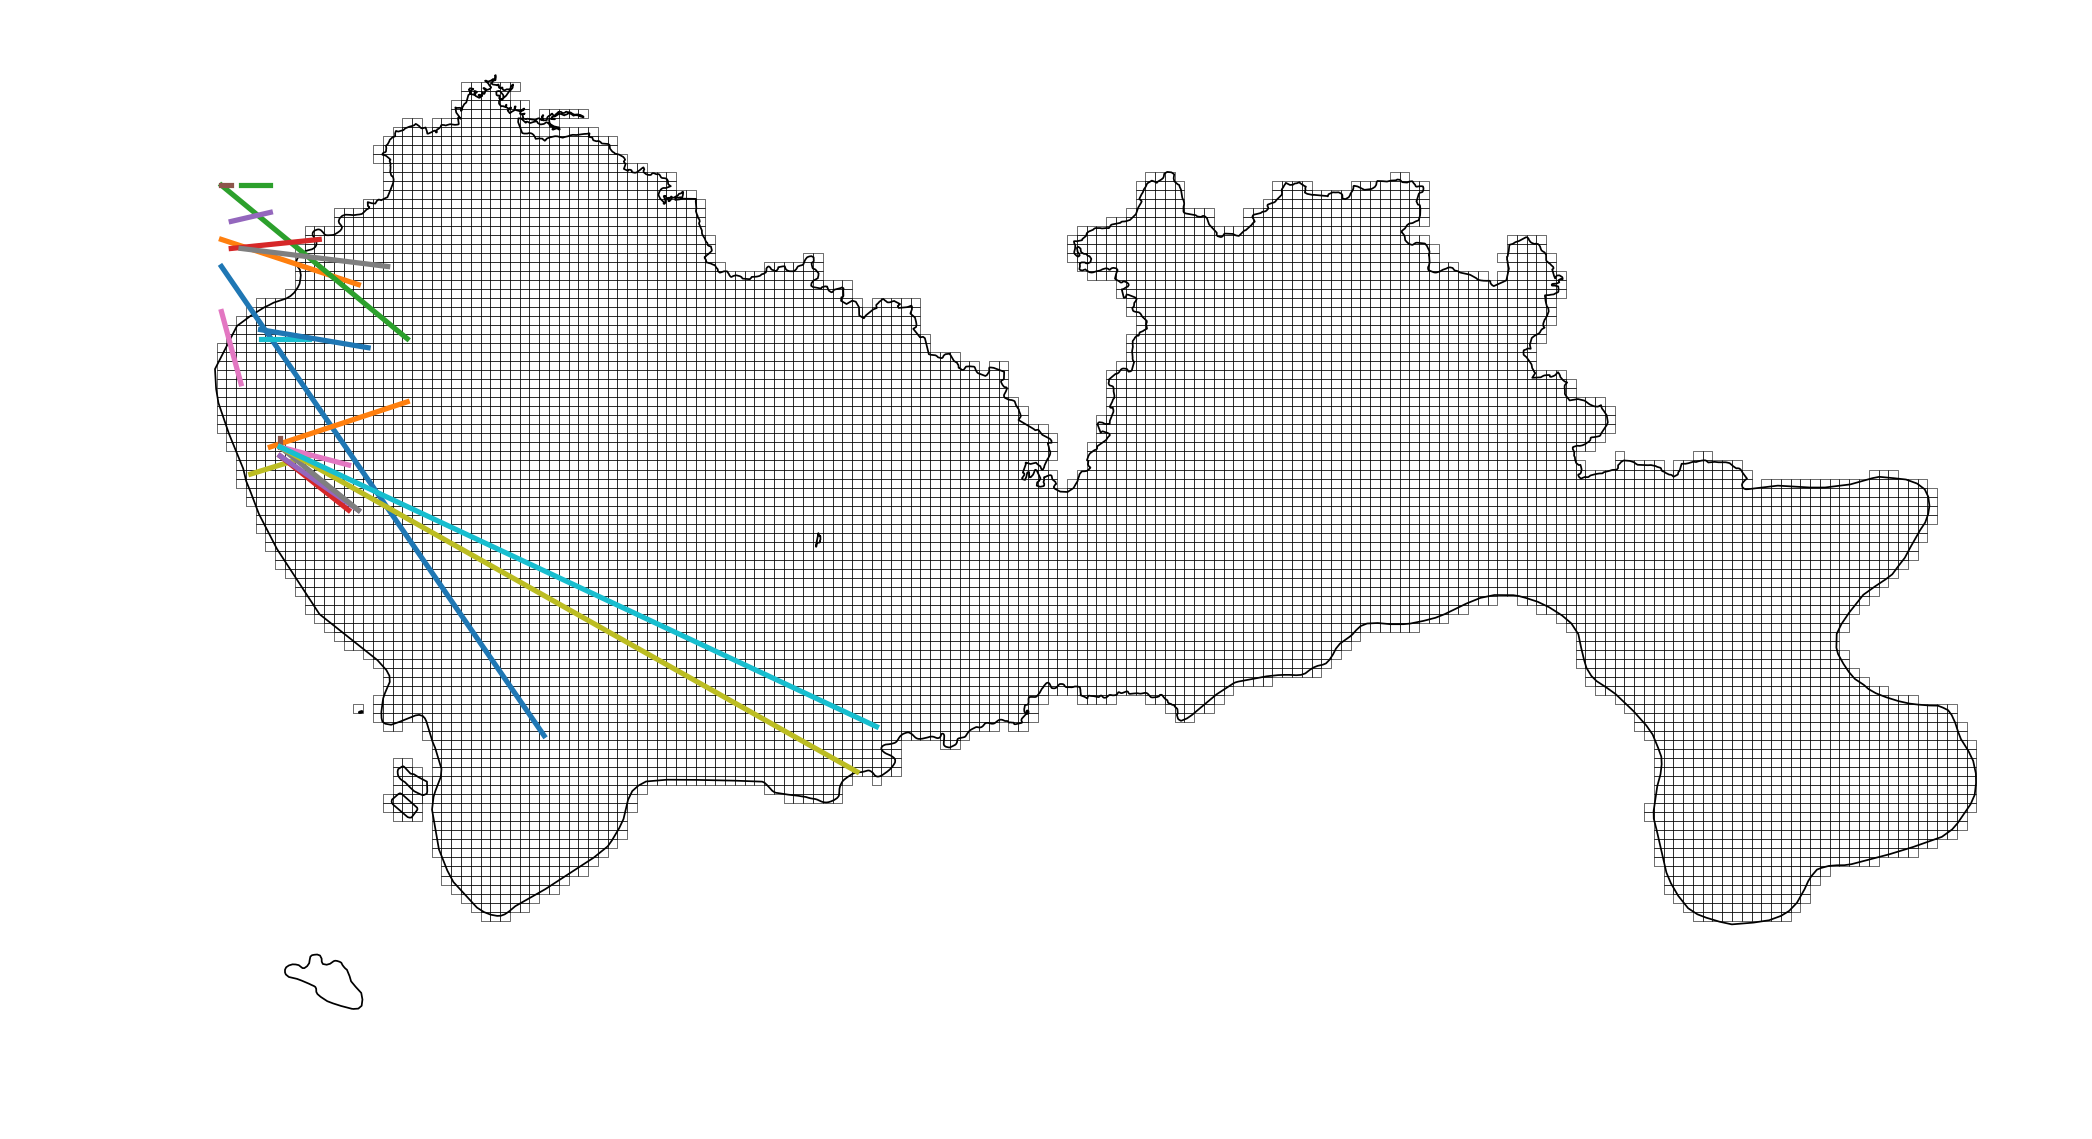

In [26]:
###############################     答案   ##################################
fig     = plt.figure(1,(10,8),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

grid.plot(ax =ax,edgecolor = (0,0,0,0.8),facecolor = (0,0,0,0),linewidths=0.2)
SZ_all.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5)

for i in range(len(Topod)):

    
    plt.plot([Topod['SHBLON'].iloc[i],Topod['EHBLON'].iloc[i]],[Topod['SHBLAT'].iloc[i],Topod['EHBLAT'].iloc[i]])


#不显示坐标轴
plt.axis('off')

plt.show()

In [27]:
OD1 = OD[OD['VehicleNum']>10].copy()

#OD从小到大排序方便我们后续操作，因为我们希望小的OD先画，放在最底下，大的OD后画，放在最上面
OD1 = OD1.sort_values(by = 'VehicleNum')

#计算起点栅格的中心点经纬度
OD1['SHBLON'] = OD1['SLONCOL'] * deltaLon + (lonStart - deltaLon / 2)
OD1['SHBLAT'] = OD1['SLATCOL'] * deltaLat + (latStart - deltaLat / 2)

#计算终点栅格的中心点经纬度
OD1['EHBLON'] = OD1['ELONCOL'] * deltaLon + (lonStart - deltaLon / 2)
OD1['EHBLAT'] = OD1['ELATCOL'] * deltaLat + (latStart - deltaLat / 2)

#对OD分5组，生成一个取值为0-1的列，每组的值相同，用以表示OD的粗细，取名linewidth
step = 5
OD1['linewidth'] = (np.array(range(len(OD1)))*step/len(OD1)).astype('int')/step+0.1
OD1.head(5)

,SLONCOL,SLATCOL,ELONCOL,ELATCOL,VehicleNum,SHBLON,SHBLAT,EHBLON,EHBLAT,linewidth
960,12,40,12,39,11,113.807975,22.625453,113.807975,22.620956,0.1
104714,61,22,58,21,11,114.046733,22.544514,114.032115,22.540017,0.1
104605,61,22,12,40,11,114.046733,22.544514,113.807975,22.625453,0.1
104446,61,21,64,16,11,114.046733,22.540017,114.061351,22.517534,0.1
104400,61,21,61,17,11,114.046733,22.540017,114.046733,22.522031,0.1


绘制OD用时 23.358479022979736 秒


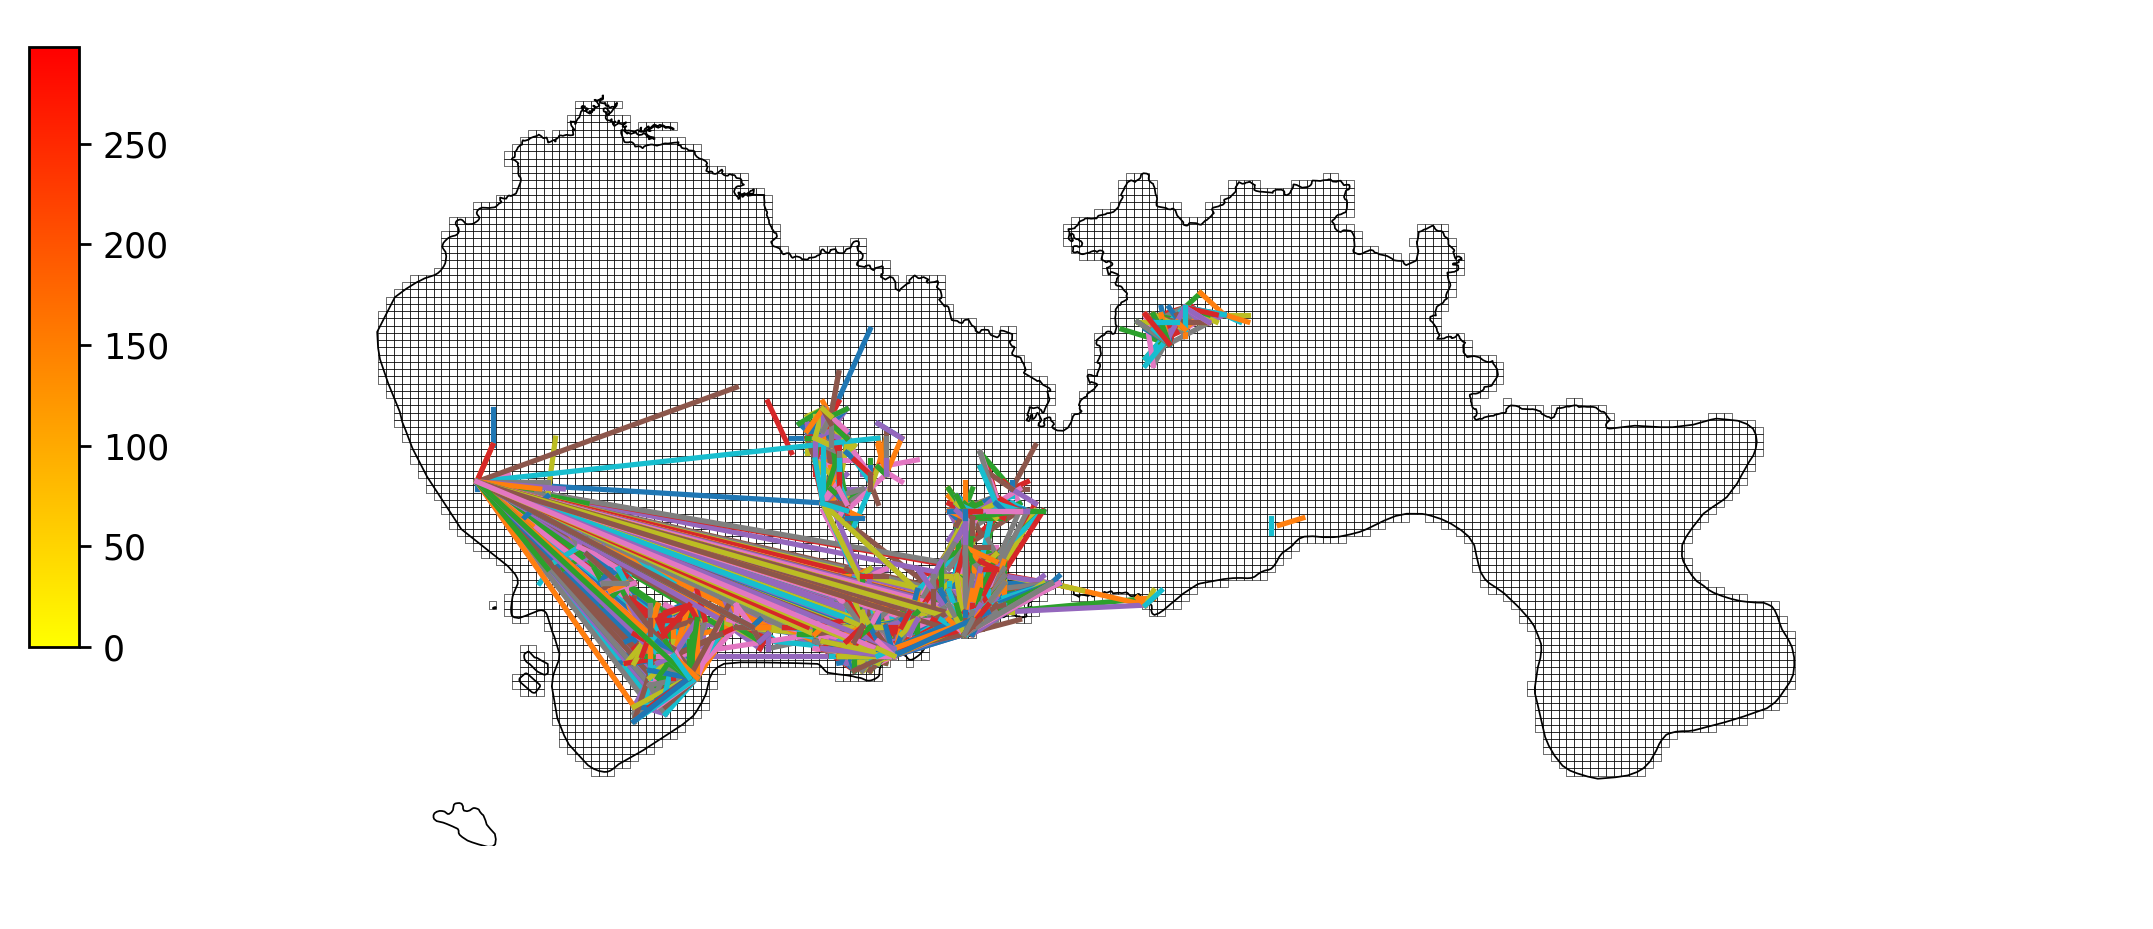

In [30]:
import time
fig     = plt.figure(1,(10,8),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

#把刚才生成的栅格在ax上绘制
grid.plot(ax = ax,edgecolor = (0,0,0,0.8),facecolor = (0,0,0,0),linewidths=0.2)

#绘制整个深圳的范围
SZ_all.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5)

#设置colormap的数据
import matplotlib
vmax = OD['VehicleNum'].max()
#设定一个标准化的工具，设定OD的colormap最大最小值，他的作用是norm(count)就会将count标准化到0-1的范围内
norm = mpl.colors.Normalize(vmin=0,vmax=vmax)
#设定colormap的颜色
cmapname = 'autumn_r'
#cmap是一个获取颜色的工具，cmap(a)会返回颜色，其中a是0-1之间的值
cmap = matplotlib.cm.get_cmap(cmapname)

#绘制OD
timeflag = time.time()
for i in range(len(OD1)):
    ###########################你需要在下面写代码#############################
    #设定plt.plot里面的参数alpha和color和linewidth
     plt.plot([OD1['SHBLON'].iloc[i],OD1['EHBLON'].iloc[i]],[OD1['SHBLAT'].iloc[i],OD1['EHBLAT'].iloc[i]])
    
    ###################################################################################
print('绘制OD用时',time.time()-timeflag,'秒')
    
#不显示坐标轴
plt.axis('off')    

#绘制假的colorbar，这是因为，我们画的OD是线，没办法直接画出来colorbar
#所以我们在一个看不见的地方画了一个叫imshow的东西，他的范围是0到vmax
#然后我们再对imshow添加colorbar
plt.imshow([[0,vmax]], cmap=cmap)
#设定colorbar的大小和位置
cax = plt.axes([0.08, 0.4, 0.02, 0.3])
plt.colorbar(cax=cax)

#然后要把镜头调整回到深圳地图那，不然镜头就在imshow那里了


ax.set_xlim(113.6,114.8)
ax.set_ylim(22.4,22.9)



plt.show()

In [31]:
###############################     答案   ##################################

from shapely.geometry import LineString
OD1['geometry'] = OD1.apply(lambda r:LineString([[r['SHBLON'],r['SHBLAT']],[r['EHBLON'],r['EHBLAT']]]),axis = 1)
OD1 = geopandas.GeoDataFrame(OD1)
###################################################################################


绘制底图用时 2.673773765563965 秒
绘制OD用时 0.497586727142334 秒


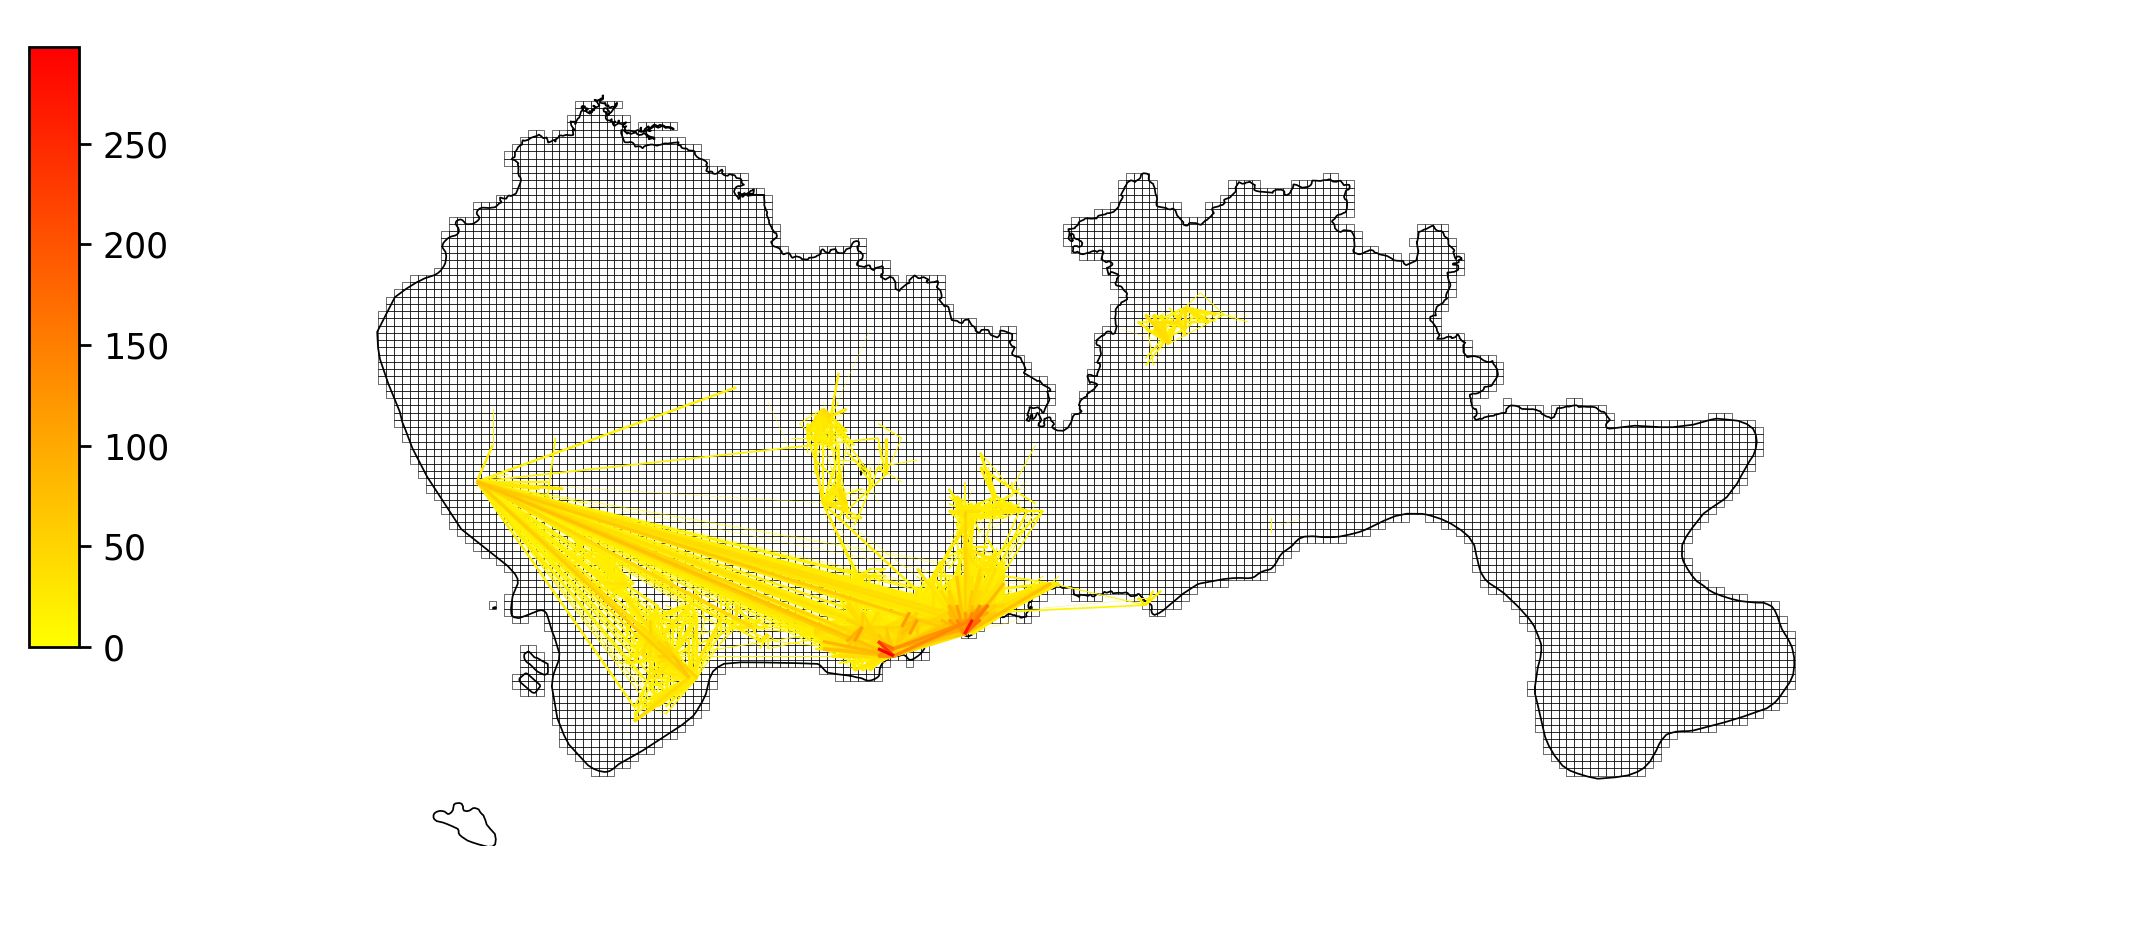

In [32]:
fig     = plt.figure(1,(10,8),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

#计时
import time
timeflag = time.time()
#绘制底图
grid.plot(ax = ax,edgecolor = (0,0,0,0.8),facecolor = (0,0,0,0),linewidths=0.2)
SZ_all.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5)
print('绘制底图用时',time.time()-timeflag,'秒')


#设置colormap的数据
import matplotlib
vmax = OD['VehicleNum'].max()
cmapname = 'autumn_r'
cmap = matplotlib.cm.get_cmap(cmapname)

timeflag = time.time()
#绘制OD
OD1.plot(ax = ax,column = 'VehicleNum',vmax = vmax,vmin = 0,cmap = cmap,linewidth = OD1['linewidth'])
print('绘制OD用时',time.time()-timeflag,'秒')

plt.axis('off')    
plt.imshow([[0,vmax]], cmap=cmap)
cax = plt.axes([0.08, 0.4, 0.02, 0.3])
plt.colorbar(cax=cax)
ax.set_xlim(113.6,114.8)
ax.set_ylim(22.4,22.9)
plt.show()

In [33]:
#集计
Odistribution = OD.groupby(['SLONCOL','SLATCOL'])['VehicleNum'].sum().reset_index()
#将集计的结果与栅格的geopandas执行merge操作
gridtoplot = pd.merge(grid,Odistribution.rename(columns = {'SLONCOL':'LONCOL','SLATCOL':'LATCOL'}),on = ['LONCOL','LATCOL'])
gridtoplot = gridtoplot.rename(columns = {'VehicleNum':'count'})

In [34]:
print(gridtoplot.head())

   LONCOL  LATCOL       HBLON      HBLAT  \
0       2      59  113.759249  22.710888   
1       3      49  113.764122  22.665922   
2       4      64  113.768994  22.733371   
3       4      65  113.768994  22.737868   
4       5      52  113.773867  22.679412   

                                            geometry  count  
0  POLYGON ((113.7568126140892 22.70864010197253,...      1  
1  POLYGON ((113.7616852281784 22.6636740499083, ...      1  
2  POLYGON ((113.7665578422676 22.73112312800465,...      1  
3  POLYGON ((113.7665578422676 22.73561973321107,...      1  
4  POLYGON ((113.7714304563568 22.67716386552757,...      1  


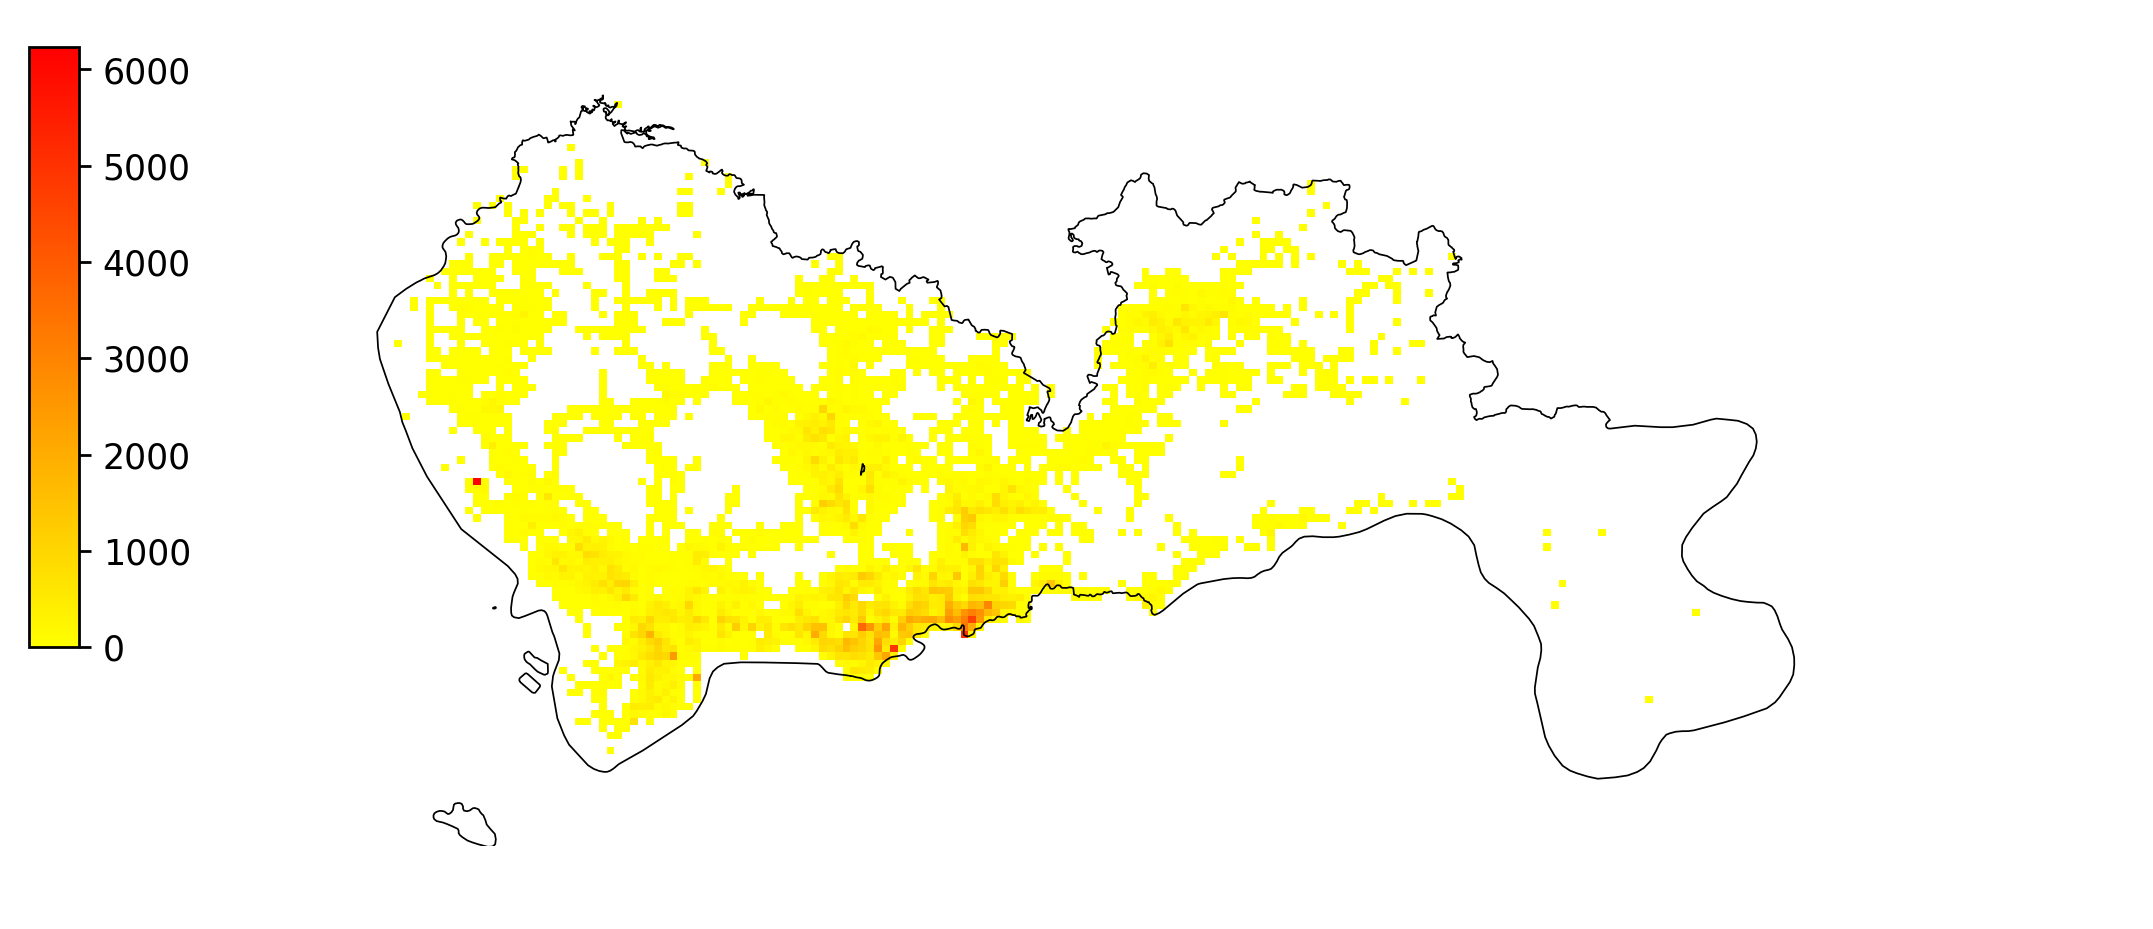

In [36]:
fig     = plt.figure(1,(10,8),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

#设置colormap的数据
import matplotlib
vmax = gridtoplot['count'].max()
#设定一个标准化的工具，设定OD的colormap最大最小值，他的作用是norm(count)就会将count标准化到0-1的范围内
norm = mpl.colors.Normalize(vmin=0,vmax=vmax)
#设定colormap的颜色
cmapname = 'autumn_r'
#cmap是一个获取颜色的工具，cmap(a)会返回颜色，其中a是0-1之间的值
cmap = matplotlib.cm.get_cmap(cmapname)


#将gridtoplot这个geodataframe进行绘制
#提示：用gridtoplot.plot，设定里面的参数是column = 'count'，以count这一列来绘制。参数cmap = cmap设定它的颜色
###########################你需要在下面写代码#############################
#gridtoplot.plot(...)

gridtoplot.plot(ax = ax,column = 'count',vmax = vmax,vmin = 0,cmap = cmap,linewidth = OD1['linewidth'])
###################################################################################

#绘制整个深圳的范围
SZ_all.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5)


#不显示坐标轴
plt.axis('off')    

#绘制假的colorbar，这是因为，我们画的OD是线，没办法直接画出来colorbar
#所以我们在一个看不见的地方画了一个叫imshow的东西，他的范围是0到vmax
#然后我们再对imshow添加colorbar
plt.imshow([[0,vmax]], cmap=cmap)
#设定colorbar的大小和位置
cax = plt.axes([0.08, 0.4, 0.02, 0.3])
plt.colorbar(cax=cax)




#然后要把镜头调整回到深圳地图那，不然镜头就在imshow那里了


ax.set_xlim(113.6,114.8)
ax.set_ylim(22.4,22.9)

plt.show()